In [3]:
import pandas as pd              #pd is an Alias

#Dealing with Missing Values
#Dealing with outliers
#Converting into categorical or numerical
#Dealing with Imbalance
#Feature selection
#Dimentionality Reduction

df=pd.read_csv("Iris.csv")

#Preparing X and Y

X = df.drop('Id', axis=1)
X = X.drop('Species', axis=1)
Y = df['Species']
#print(X)
#print(Y)


In [4]:
# Feature Selection 1
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featuresScores = pd.concat([dfcolumns, dfscores], axis=1)
featuresScores.columns = ['Specs', 'Score']

print(featuresScores)


           Specs       Score
0  SepalLengthCm   10.817821
1   SepalWidthCm    3.594499
2  PetalLengthCm  116.169847
3   PetalWidthCm   67.244828


[0.09802183 0.05000341 0.43440742 0.41756734]


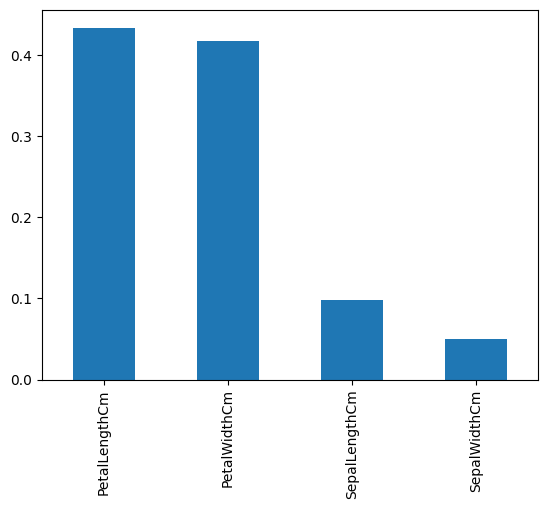

In [6]:
#Feature Selection 2

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_)

feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(4).plot(kind='bar')
plt.show()


In [7]:

#Numerical to Categorical


"\ndf['SepalLengthCm']=pd.cut(df['SepalLengthCm'],3,labels=['0','1','2'])\ndf['SepalWidthCm']=pd.cut(df['SepalWidthCm'],3,labels=['0','1','2'])\ndf['PetalLengthCm']=pd.cut(df['PetalLengthCm'],3,labels=['0','1','2'])\ndf['PetalWidthCm']=pd.cut(df['PetalWidthCm'],3,labels=['0','1','2'])\n\nprint(df)\n"

In [9]:
#Numerical to Categorical

from sklearn.preprocessing import LabelEncoder

df['SepalLengthCm']=pd.cut(df['SepalLengthCm'],3,labels=['0','1','2'])
df['SepalWidthCm']=pd.cut(df['SepalWidthCm'],3,labels=['0','1','2'])
df['PetalLengthCm']=pd.cut(df['PetalLengthCm'],3,labels=['0','1','2'])
df['PetalWidthCm']=pd.cut(df['PetalWidthCm'],3,labels=['0','1','2'])

print(df)

      Id SepalLengthCm SepalWidthCm PetalLengthCm PetalWidthCm         Species
0      1             0            1             0            0     Iris-setosa
1      2             0            1             0            0     Iris-setosa
2      3             0            1             0            0     Iris-setosa
3      4             0            1             0            0     Iris-setosa
4      5             0            1             0            0     Iris-setosa
..   ...           ...          ...           ...          ...             ...
145  146             1            1             2            2  Iris-virginica
146  147             1            0             2            2  Iris-virginica
147  148             1            1             2            2  Iris-virginica
148  149             1            1             2            2  Iris-virginica
149  150             1            1             2            2  Iris-virginica

[150 rows x 6 columns]


In [10]:
X = df.drop('Id', axis=1)
X = X.drop('Species', axis=1)
Y = df['Species']
print(Y)
le=LabelEncoder()
le.fit(Y)
Y = le.transform(Y)
print(Y)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [13]:
#Categorical to Numerical
le=LabelEncoder()
le.fit(Y)
Y = le.transform(Y)

In [19]:

#Dealing with missing values


1. Use Drop (df.drop())
2. use Replace (df.replace("back","DOS"))
3. Fill NA ()

print(df.isnull().sum())
df['Item_Weight'].fillna((df['Item_Weight'].mean()),inplace=True)
#Imputing Neurimical Values

df['Outlet_Size'].fillna(('Mean'), inplace=True)
#Imputing Categorical Values



SyntaxError: invalid syntax (<ipython-input-19-5e4473e9fe74>, line 4)

In [20]:
#Oversampling and Under Sampling
#a = (df['Species'] == 'Iris-setosa').sum()
#print(a)
from collections import Counter
print(Counter(Y))
from imblearn.over_sampling import RandomOverSampler     #Random OverSampling
ros=RandomOverSampler(random_state=0)
X, Y = ros.fit_resample(X,Y)
print(Counter(Y))

from imblearn.over_sampling import SMOTE                 #Synthetic Minority Oversampling (SMOTE) oversampling
sms=SMOTE(random_state=0)
X, Y=sms.fit_resample(X,Y)

from imblearn.under_sampling import RandomUnderSampler   #Random UnderSampling
rus=RandomUnderSampler(random_state=0)
X, Y=rus.fit_resample(X,Y)


Counter({0: 50, 1: 50, 2: 50})
Counter({0: 50, 1: 50, 2: 50})


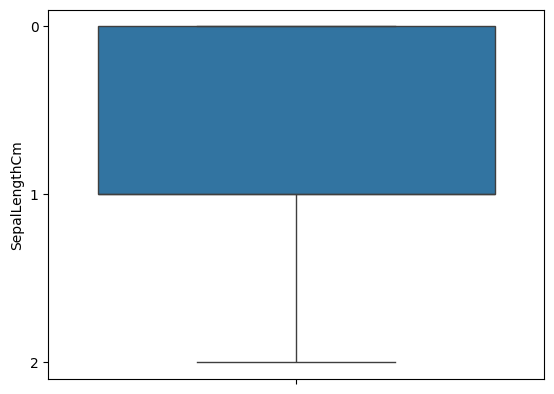

In [21]:

#Identifying Outliers by ploting

from matplotlib import pyplot as plt
import seaborn as sns
sns.boxplot(df['SepalLengthCm'])
plt.show()


In [22]:
#Dealing with Outliers using Interquantile Range

print(df['SepalLengthCm'])
Q1 = df['SepalLengthCm'].quantile(0.25)
Q3 = df['SepalLengthCm'].quantile(0.75)

IQR = Q3 - Q1
print(IQR)

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

print(upper)
print(lower)

out1=df[df['SepalLengthCm'] < lower].values
out2=df[df['SepalLengthCm'] > upper].values

df['SepalLengthCm'].replace(out1,lower,inplace=True)
df['SepalLengthCm'].replace(out2,upper,inplace=True)

print(df['SepalLengthCm'])

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: SepalLengthCm, Length: 150, dtype: category
Categories (3, object): ['0' < '1' < '2']


AssertionError: 

In [23]:
#Principal Component Analysis

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

logr=LogisticRegression()
pca=PCA(n_components=2)

X = df.drop('Id', axis=1)
X = X.drop('Species', axis=1)
Y = df['Species']

pca.fit(X)
X=pca.transform(X)

print(X)

X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=0,test_size=0.3)

logr.fit(X_train,y_train)

y_pred=logr.predict(X_test)
print(accuracy_score(y_test,y_pred))

[[-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.76935658  0.83331324]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.76935658  0.83331324]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.31321774  1.20402635]
 [-1.31321774  1.20402635]
 [-1.76935658  0.83331324]
 [-1.57432707 -0.09529009]
 [-1.31321774  1.20402635]
 [-1.76935658  0.83331324]
 [-1.57432707 -0.09529009]
 [-1.76935658  0.83331324]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.76935658  0.83331324]
 [-1.76935658  0.83331324]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 [-1.57432707 -0.09529009]
 